<a href="https://colab.research.google.com/github/vivekkchandra/CE888/blob/master/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [0]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np
import random


In [0]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]
data

array([ 2.,  8., 20., 13.,  5.,  9., 10.,  8., 22., 10.,  2.,  4.,  7.,
        9.])

In [0]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Create an array of samples of shape (n_iterations, sample_size)
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. In each iteration:
# 3.1 Get the data corresponding to that iteration (new_samples[iteration, :])
# 3.2 Calculate the mean of the iteration data and store it
# (At this point you should have an array of n_iterations values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval


def boostrap_mean(sample, sample_size, n_iterations):
	# <---INSERT YOUR CODE HERE--->
 
 #Making the sample array
 
 
	sample_arr = np.random.randint(1, size=(n_iterations,sample_size))
	for i in range (0,n_iterations):
		for j in range (0,sample_size):
			sample_number = sample[random.randint(0,13)]
			sample_arr[i][j] = sample_number
		 #print(sample_number)
	 
	# calculatiing the mean

	data_mean = np.mean(sample_arr)
	mean_array = np.array(sample_arr.mean(axis=1))

	# calculating the lower and upper bounds
	ci=95
	lower_percentle=(100-ci)/2
	upper_percentile=100-lower_percentle

	upper=np.percentile(mean_array, upper_percentile)
	lower=np.percentile(mean_array, lower_percentle)


 # print(lower)
  #print(upper)
	return data_mean, lower, upper
#boot = boostrap_mean(data, data.shape[0], 10000)


(0.0, 50000.0)

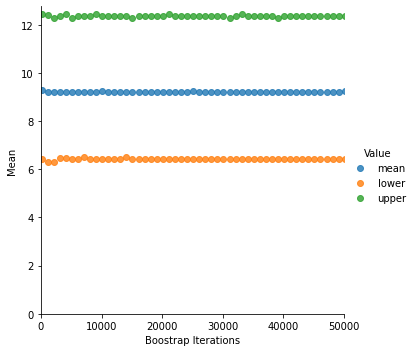

In [0]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')




Now, modify the bootstrap function so that you can pass your desired confidence interval as a parameter.



In [0]:
def boostrap_mean_ci(sample, sample_size, n_iterations, ci):

	# <---INSERT YOUR CODE HERE--->
 
 #Sample array
 
	sample_arr = np.random.randint(1, size=(n_iterations,sample_size))
	for i in range (0,n_iterations):
		for j in range (0,sample_size):
			sample_number = sample[random.randint(0,13)]
			sample_arr[i][j] = sample_number
		 

	data_mean = np.mean(sample_arr)
	mean_arr = np.array(sample_arr.mean(axis=1))

	lower_percentle=(100-ci)/2
	upper_percentile=100-lower_percentle
	upper=np.percentile(mean_arr, upper_percentile)
	lower=np.percentile(mean_arr, lower_percentle)
	return data_mean, lower, upper



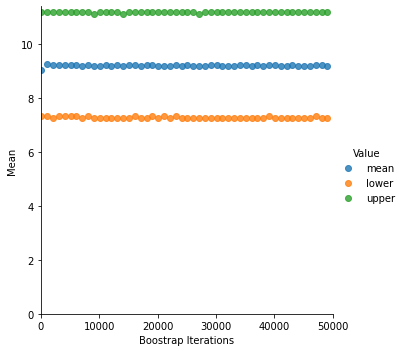

In [0]:

boots = []
for i in range(100, 50000, 1000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset. Load the vehicles.csv file and check the Moodle page for instructions on how to proceed


In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv")

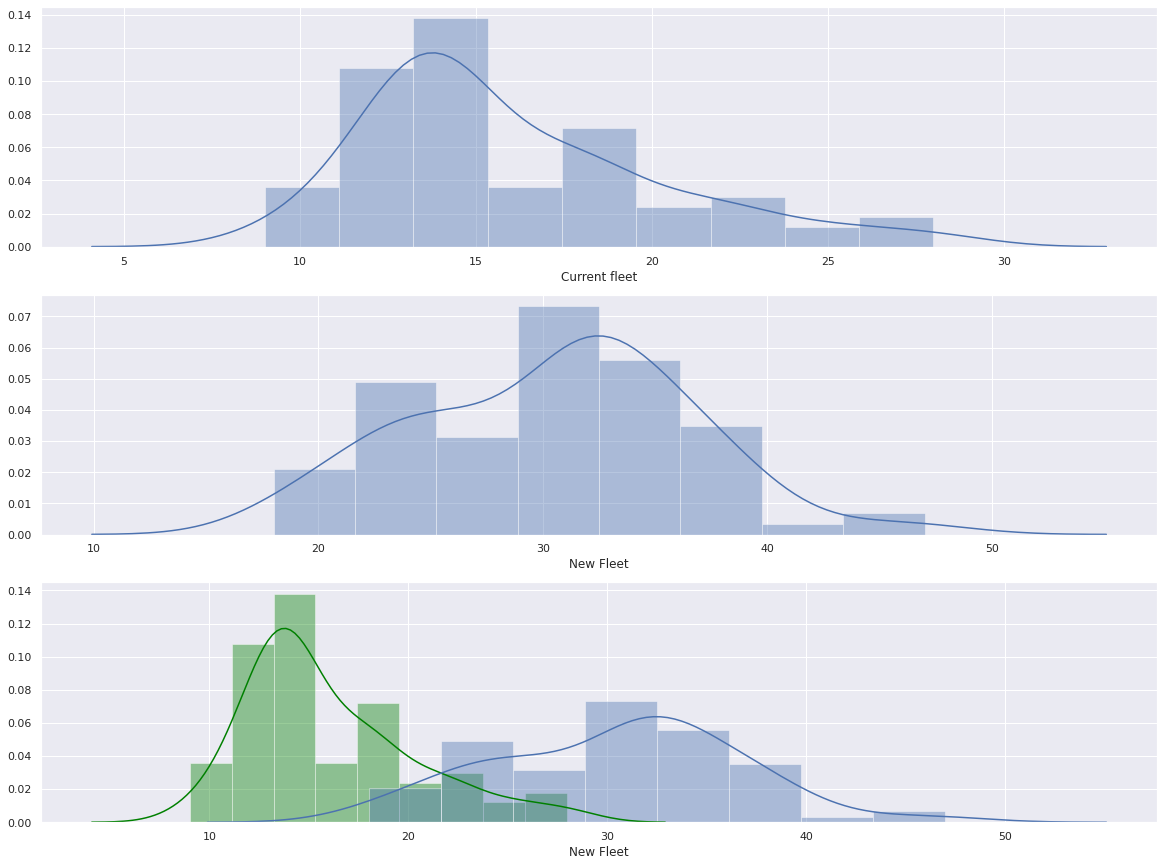

In [0]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt


new_fleat=df["New Fleet"].isna().sum()
plt.show()



fig, ax =plt.subplots(3,1)
fig.set_size_inches((20,15))
sns.distplot(df["Current fleet"][:-new_fleat],axlabel="Current fleet",ax=ax[0])
sns.distplot(df["New Fleet"][:-new_fleat],label="New Fleet",ax=ax[1])

sns.distplot(df["Current fleet"][:-new_fleat],label="Current fleet",ax=ax[2],color='green')
sns.distplot(df["New Fleet"][:-new_fleat],label="New Fleet",ax=ax[2])

fig.show()

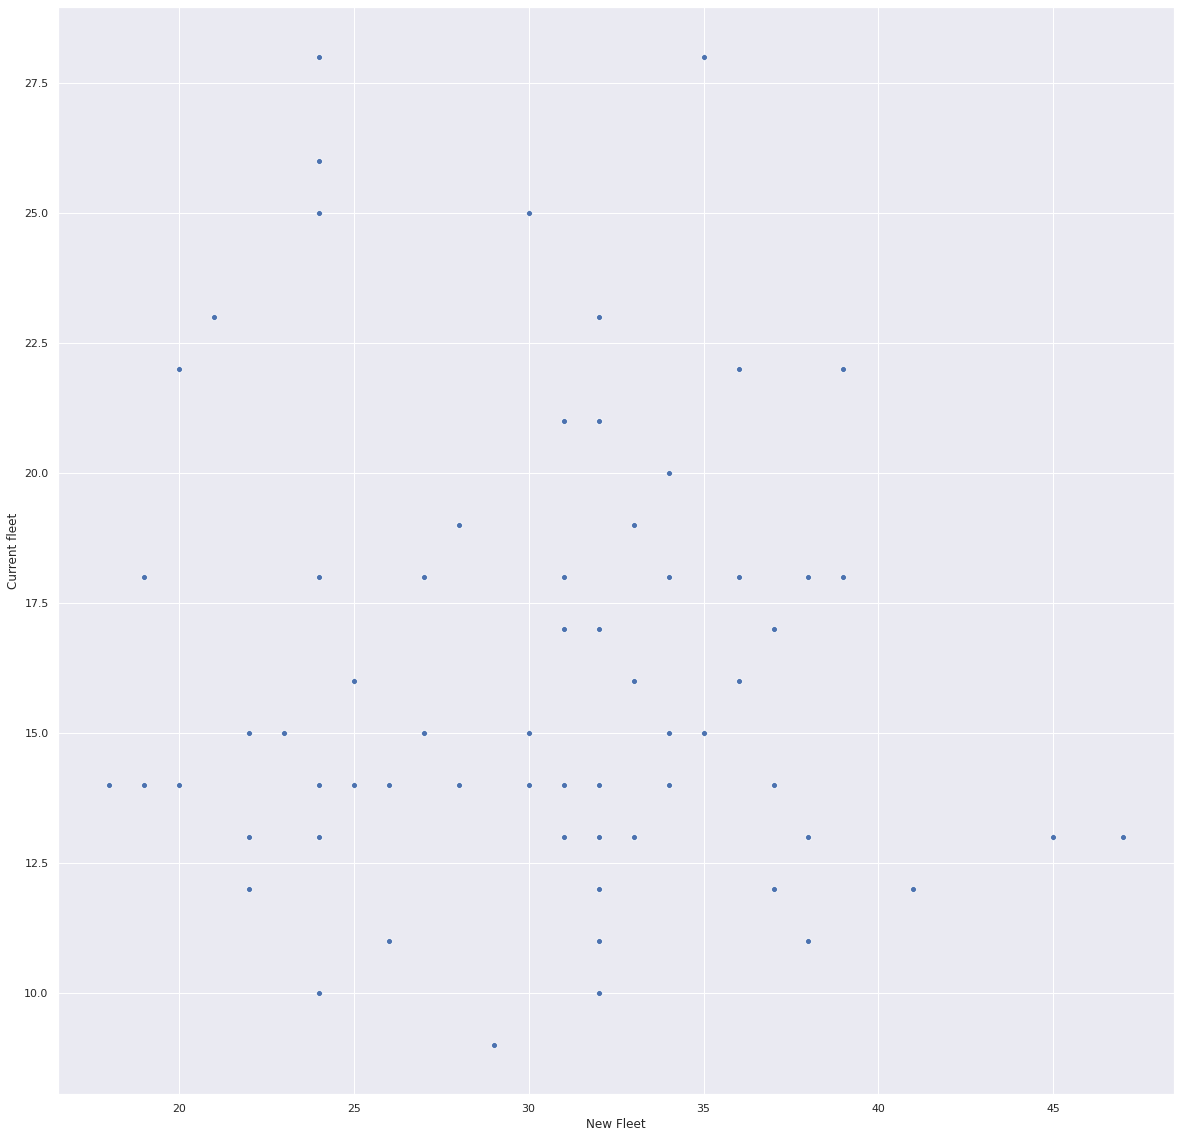

In [0]:
fig, y =plt.subplots(1,1)
fig.set_size_inches((20,20))
sns.scatterplot(df["New Fleet"],df["Current fleet"],size_norm=20)
fig.show()

In [0]:
new_fleat=df["New Fleet"].isna().sum()
new_fleet=df.values.T[1][:-new_fleat]
old_fleet=df.values.T[0][:-new_fleat]

In [0]:
print("old mean =", old_fleet.mean(), " new mean = ",new_fleet.mean())

old mean = 16.025316455696203  new mean =  30.481012658227847


In [0]:
data_mean_new_fleet, lower_new_fleet, upper_new_fleet=boostrap_mean_ci(new_fleet, new_fleet.shape[0], 50000, 90)
data_mean_old_fleet, lower_old_fleet, upper_old_fleet=boostrap_mean_ci(old_fleet, old_fleet.shape[0], 50000, 90)

In [0]:
print("new=",data_mean_new_fleet, lower_new_fleet, upper_new_fleet)
print("old=",data_mean_old_fleet, lower_old_fleet, upper_old_fleet)

new= 25.00104253164557 24.17721518987342 25.848101265822784
old= 15.28573088607595 15.037974683544304 15.544303797468354


In [0]:
#permutation testing
def perm_test(n,new_fleet,old_fleet):
    num=0
    total_act = new_fleet.mean()-old_fleet.mean()
    total_act
    for i in range(0,n):
        merged = np.concatenate([new_fleet,old_fleet])
        np.random.shuffle(merged)
        perm_old=merged[:int(len(merged)/2)]
        perm_new=merged[int(len(merged)/2):]
        total_perm=perm_new.mean()-perm_old.mean()
        if(total_perm>total_act):
            num+=1

    return num/n
perm_value=perm_test(1000,new_fleet,old_fleet)
print("permutation testing value--->",perm_value)


permutation testing value---> 0.0
